In [95]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

In [96]:
import os

downloads_path = os.path.expanduser('~/Downloads')  
os.chdir(downloads_path)

# Load the CSV file
train_data = pd.read_csv('train_data_final.csv')
test_data = pd.read_csv('test_data.csv')


In [97]:
df1 = pd.read_csv('train_data_final.csv')

In [98]:
df1.shape

(500000, 10)

In [99]:
train_data.head()

,Unnamed: 0,anti_symmetry,proportion_red,blockiness_values,transition_frequency,popular_proportions,transition_frequency_squared_distance,anti_symmetry_squared_distance,length,fractions
0,0,0.4800000000,0.5000000000,0.0800000000,0.2600000000,0.5000000000,0.0125319500,-0.0198438000,3,0.2579591837
1,1,0.5200000000,0.5000000000,0.0600000000,0.2250000000,0.5000000000,-0.0224680500,0.0201562000,3,0.2355102041
2,2,0.4400000000,0.5400000000,0.0700000000,0.2400000000,0.5400000000,-0.0074680500,-0.0598438000,3,0.2428571429
3,3,0.5800000000,0.4900000000,0.0900000000,0.2300000000,0.5100000000,-0.0174680500,0.0801562000,3,0.2371428571
4,4,0.5600000000,0.5200000000,0.0700000000,0.2450000000,0.5200000000,-0.0024680500,0.0601562000,3,0.2391836735


In [100]:
train_data.shape

(500000, 10)

In [101]:
length_constant  = [(1/2)**3]*100000 + [(1/2)**4]*100000 + [(1/2)**5]*100000 + [(1/2)*6]*100000 + [(1/2)**7]*100000

In [102]:
train_data['length_constant'] =  length_constant

In [103]:
train_data.head()

,Unnamed: 0,anti_symmetry,proportion_red,blockiness_values,transition_frequency,popular_proportions,transition_frequency_squared_distance,anti_symmetry_squared_distance,length,fractions,length_constant
0,0,0.4800000000,0.5000000000,0.0800000000,0.2600000000,0.5000000000,0.0125319500,-0.0198438000,3,0.2579591837,0.1250000000
1,1,0.5200000000,0.5000000000,0.0600000000,0.2250000000,0.5000000000,-0.0224680500,0.0201562000,3,0.2355102041,0.1250000000
2,2,0.4400000000,0.5400000000,0.0700000000,0.2400000000,0.5400000000,-0.0074680500,-0.0598438000,3,0.2428571429,0.1250000000
3,3,0.5800000000,0.4900000000,0.0900000000,0.2300000000,0.5100000000,-0.0174680500,0.0801562000,3,0.2371428571,0.1250000000
4,4,0.5600000000,0.5200000000,0.0700000000,0.2450000000,0.5200000000,-0.0024680500,0.0601562000,3,0.2391836735,0.1250000000


In [104]:
train_data.dtypes

Unnamed: 0                                 int64
anti_symmetry                            float64
proportion_red                           float64
blockiness_values                        float64
transition_frequency                     float64
popular_proportions                      float64
transition_frequency_squared_distance    float64
anti_symmetry_squared_distance           float64
length                                     int64
fractions                                float64
length_constant                          float64
dtype: object

In [105]:
# length_constant = [(1/2)**3]*

In [106]:
train_data.head()

,Unnamed: 0,anti_symmetry,proportion_red,blockiness_values,transition_frequency,popular_proportions,transition_frequency_squared_distance,anti_symmetry_squared_distance,length,fractions,length_constant
0,0,0.4800000000,0.5000000000,0.0800000000,0.2600000000,0.5000000000,0.0125319500,-0.0198438000,3,0.2579591837,0.1250000000
1,1,0.5200000000,0.5000000000,0.0600000000,0.2250000000,0.5000000000,-0.0224680500,0.0201562000,3,0.2355102041,0.1250000000
2,2,0.4400000000,0.5400000000,0.0700000000,0.2400000000,0.5400000000,-0.0074680500,-0.0598438000,3,0.2428571429,0.1250000000
3,3,0.5800000000,0.4900000000,0.0900000000,0.2300000000,0.5100000000,-0.0174680500,0.0801562000,3,0.2371428571,0.1250000000
4,4,0.5600000000,0.5200000000,0.0700000000,0.2450000000,0.5200000000,-0.0024680500,0.0601562000,3,0.2391836735,0.1250000000


In [107]:
train_data.drop(columns=['Unnamed: 0'], inplace=True)

In [108]:
train_data.head()

,anti_symmetry,proportion_red,blockiness_values,transition_frequency,popular_proportions,transition_frequency_squared_distance,anti_symmetry_squared_distance,length,fractions,length_constant
0,0.4800000000,0.5000000000,0.0800000000,0.2600000000,0.5000000000,0.0125319500,-0.0198438000,3,0.2579591837,0.1250000000
1,0.5200000000,0.5000000000,0.0600000000,0.2250000000,0.5000000000,-0.0224680500,0.0201562000,3,0.2355102041,0.1250000000
2,0.4400000000,0.5400000000,0.0700000000,0.2400000000,0.5400000000,-0.0074680500,-0.0598438000,3,0.2428571429,0.1250000000
3,0.5800000000,0.4900000000,0.0900000000,0.2300000000,0.5100000000,-0.0174680500,0.0801562000,3,0.2371428571,0.1250000000
4,0.5600000000,0.5200000000,0.0700000000,0.2450000000,0.5200000000,-0.0024680500,0.0601562000,3,0.2391836735,0.1250000000


In [109]:
test_data['length_constant'] = [(1/2)**3]*50000

In [110]:
test_data.head()

,Unnamed: 0,anti_symmetry,proportion_red,blockiness_values,transition_frequency,popular_proportions,transition_frequency_squared_distance,anti_symmetry_squared_distance,length_test,fractions,length_constant
0,0,0.6400000000,0.5000000000,0.0700000000,0.2650000000,0.5000000000,0.0175296000,0.1406788000,3,0.2432653061,0.1250000000
1,1,0.6000000000,0.5200000000,0.1100000000,0.2550000000,0.5200000000,0.0075296000,0.1006788000,3,0.2420408163,0.1250000000
2,2,0.5400000000,0.4900000000,0.0700000000,0.2750000000,0.5100000000,0.0275296000,0.0406788000,3,0.2408163265,0.1250000000
3,3,0.3200000000,0.5600000000,0.0500000000,0.2700000000,0.5600000000,0.0225296000,-0.1793212000,3,0.2461224490,0.1250000000
4,4,0.5400000000,0.4500000000,0.0900000000,0.2400000000,0.5500000000,-0.0074704000,0.0406788000,3,0.2420408163,0.1250000000


In [111]:
test_data.drop(columns=['Unnamed: 0'], inplace=True)

In [112]:
# Rename columns
test_data.rename(columns={'length_test': 'length', 'fractions': 'target'}, inplace=True)
train_data.rename(columns={'fractions': 'target'}, inplace=True)

In [113]:
test_data.head(0)

,anti_symmetry,proportion_red,blockiness_values,transition_frequency,popular_proportions,transition_frequency_squared_distance,anti_symmetry_squared_distance,length,target,length_constant


In [114]:
test_data.head()

,anti_symmetry,proportion_red,blockiness_values,transition_frequency,popular_proportions,transition_frequency_squared_distance,anti_symmetry_squared_distance,length,target,length_constant
0,0.6400000000,0.5000000000,0.0700000000,0.2650000000,0.5000000000,0.0175296000,0.1406788000,3,0.2432653061,0.1250000000
1,0.6000000000,0.5200000000,0.1100000000,0.2550000000,0.5200000000,0.0075296000,0.1006788000,3,0.2420408163,0.1250000000
2,0.5400000000,0.4900000000,0.0700000000,0.2750000000,0.5100000000,0.0275296000,0.0406788000,3,0.2408163265,0.1250000000
3,0.3200000000,0.5600000000,0.0500000000,0.2700000000,0.5600000000,0.0225296000,-0.1793212000,3,0.2461224490,0.1250000000
4,0.5400000000,0.4500000000,0.0900000000,0.2400000000,0.5500000000,-0.0074704000,0.0406788000,3,0.2420408163,0.1250000000


In [115]:
test_data.shape

(50000, 10)

In [116]:
X_train = train_data.drop(columns = ['target'])

In [117]:
X_train.head()

,anti_symmetry,proportion_red,blockiness_values,transition_frequency,popular_proportions,transition_frequency_squared_distance,anti_symmetry_squared_distance,length,length_constant
0,0.4800000000,0.5000000000,0.0800000000,0.2600000000,0.5000000000,0.0125319500,-0.0198438000,3,0.1250000000
1,0.5200000000,0.5000000000,0.0600000000,0.2250000000,0.5000000000,-0.0224680500,0.0201562000,3,0.1250000000
2,0.4400000000,0.5400000000,0.0700000000,0.2400000000,0.5400000000,-0.0074680500,-0.0598438000,3,0.1250000000
3,0.5800000000,0.4900000000,0.0900000000,0.2300000000,0.5100000000,-0.0174680500,0.0801562000,3,0.1250000000
4,0.5600000000,0.5200000000,0.0700000000,0.2450000000,0.5200000000,-0.0024680500,0.0601562000,3,0.1250000000


In [118]:
X_train.dtypes

anti_symmetry                            float64
proportion_red                           float64
blockiness_values                        float64
transition_frequency                     float64
popular_proportions                      float64
transition_frequency_squared_distance    float64
anti_symmetry_squared_distance           float64
length                                     int64
length_constant                          float64
dtype: object

In [119]:
np.mean(length_constant)


0.6453125

In [120]:
import pandas as pd
pd.set_option('display.float_format', '{:.10f}'.format)  
corr_matrix = X_train.corr()
corr_matrix


,anti_symmetry,proportion_red,blockiness_values,transition_frequency,popular_proportions,transition_frequency_squared_distance,anti_symmetry_squared_distance,length,length_constant
anti_symmetry,1.0000000000,-0.0002175566,-0.0145188171,0.0134894264,-0.0928339510,0.0134894264,1.0000000000,0.0000000000,0.0000000000
proportion_red,-0.0002175566,1.0000000000,0.0007611019,0.0012266863,0.0029665418,0.0012266863,-0.0002175566,0.0000000000,0.0000000000
blockiness_values,-0.0145188171,0.0007611019,1.0000000000,-0.4449529530,0.2051158294,-0.4449529530,-0.0145188171,0.0000000000,0.0000000000
transition_frequency,0.0134894264,0.0012266863,-0.4449529530,1.0000000000,-0.1390345413,1.0000000000,0.0134894264,-0.0000000000,0.0000000000
popular_proportions,-0.0928339510,0.0029665418,0.2051158294,-0.1390345413,1.0000000000,-0.1390345413,-0.0928339510,0.0000000000,0.0000000000
transition_frequency_squared_distance,0.0134894264,0.0012266863,-0.4449529530,1.0000000000,-0.1390345413,1.0000000000,0.0134894264,-0.0000000000,-0.0000000000
anti_symmetry_squared_distance,1.0000000000,-0.0002175566,-0.0145188171,0.0134894264,-0.0928339510,0.0134894264,1.0000000000,-0.0000000000,-0.0000000000
length,0.0000000000,0.0000000000,0.0000000000,-0.0000000000,0.0000000000,-0.0000000000,-0.0000000000,1.0000000000,0.3245156116
length_constant,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,-0.0000000000,-0.0000000000,0.3245156116,1.0000000000


In [121]:
X_train['length_constant'].mean()

0.6453125

In [122]:
y_train = train_data['target']

In [123]:
X_test = test_data.drop(columns = ['target'])

In [124]:
y_test = test_data['target']

In [125]:
y_test.describe()

count   50000.0000000000
mean        0.2499167102
std         0.0125256292
min         0.2265306122
25%         0.2416326531
50%         0.2465306122
75%         0.2546938776
max         0.4020408163
Name: target, dtype: float64

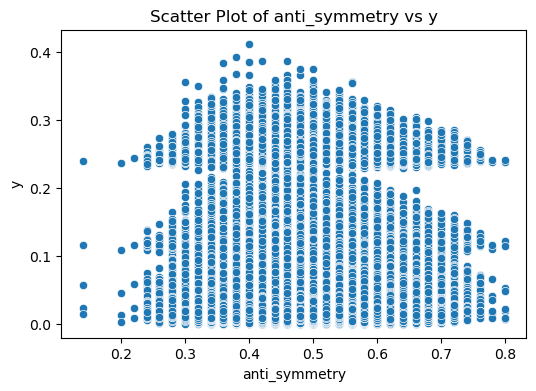

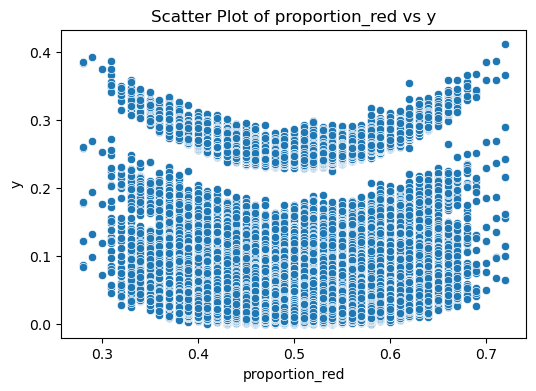

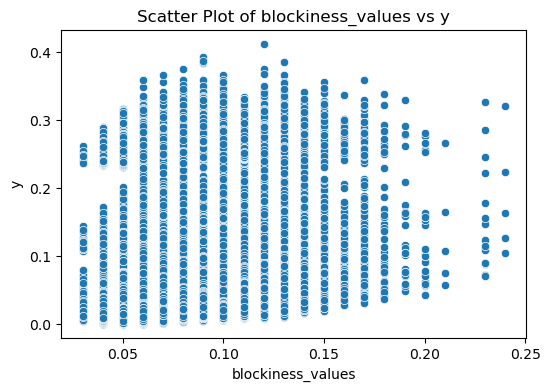

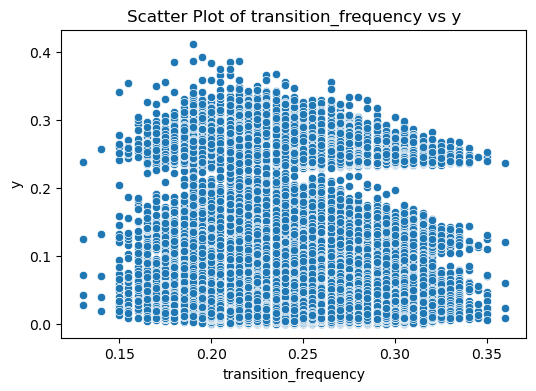

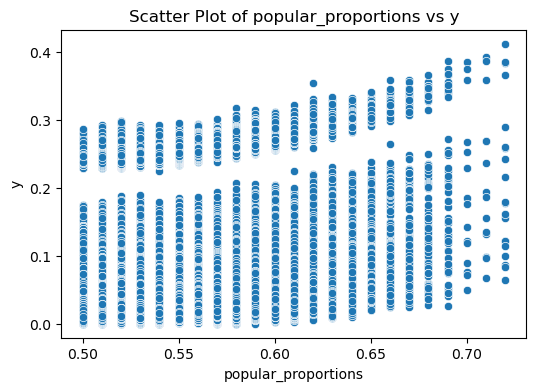

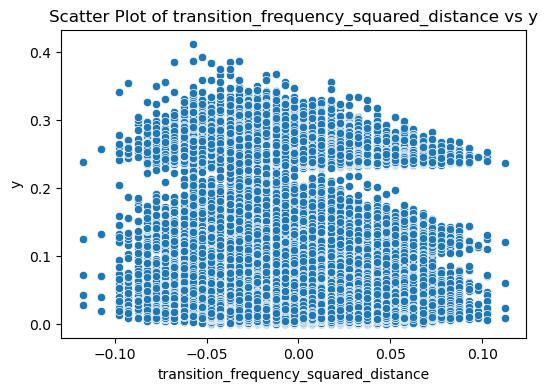

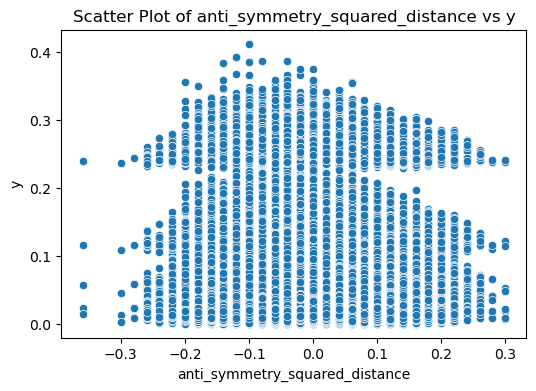

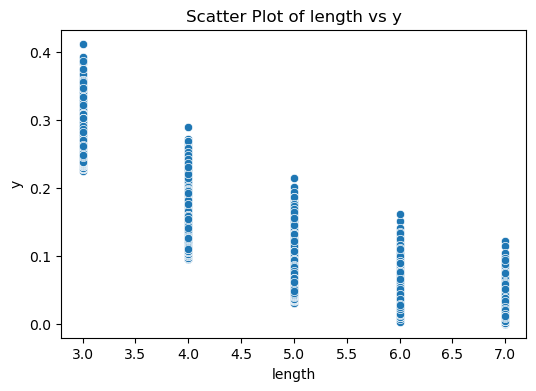

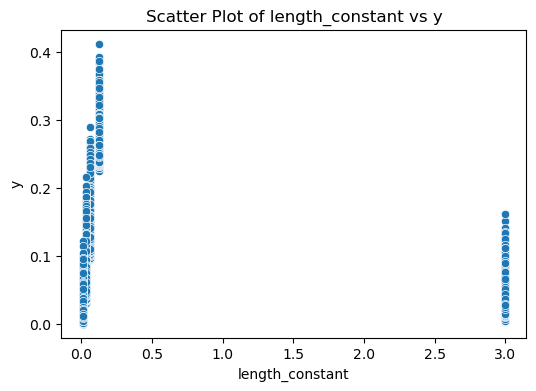

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train is a DataFrame and y_train is a Series
for feature in X_train.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train[feature], y=y_train)
    plt.title(f'Scatter Plot of {feature} vs y')
    plt.xlabel(feature)
    plt.ylabel('y')
    plt.show()


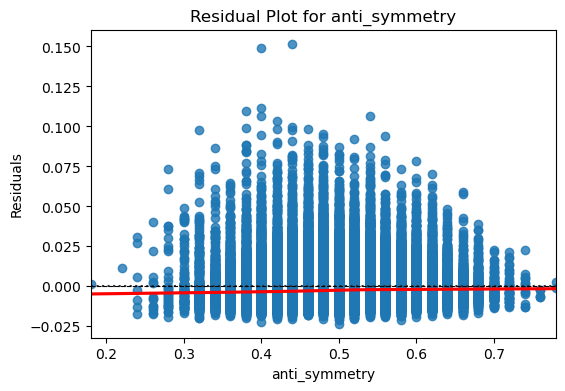

Mean Squared Error for anti_symmetry: 0.0236


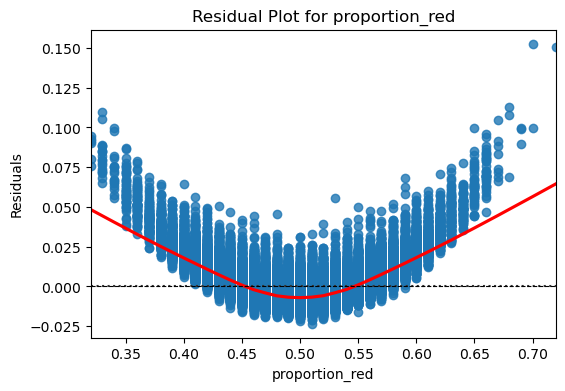

Mean Squared Error for proportion_red: 0.0236


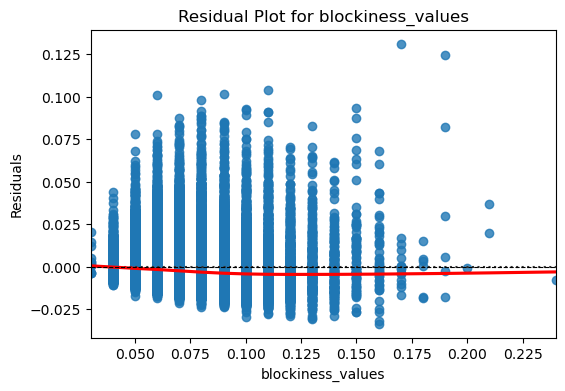

Mean Squared Error for blockiness_values: 0.0236


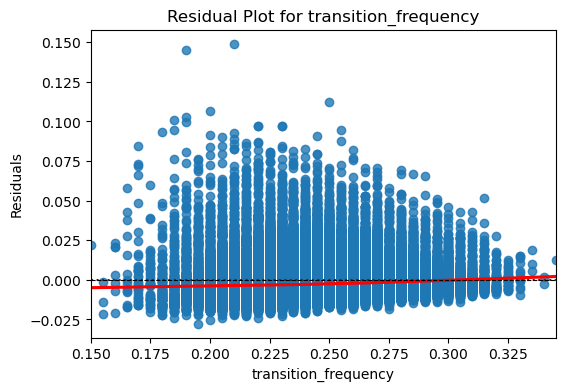

Mean Squared Error for transition_frequency: 0.0236


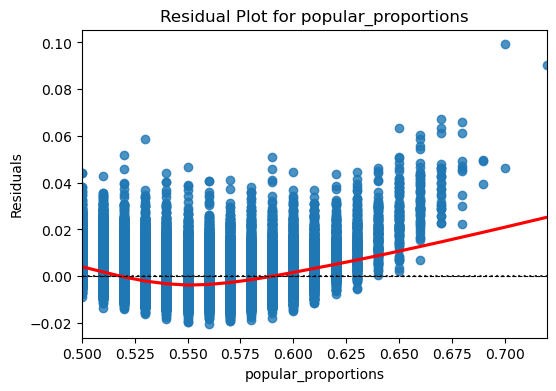

Mean Squared Error for popular_proportions: 0.0235


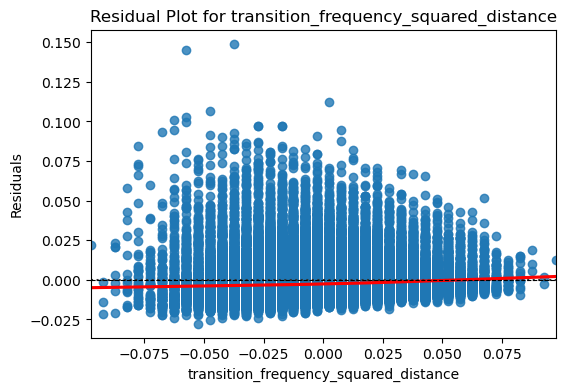

Mean Squared Error for transition_frequency_squared_distance: 0.0236


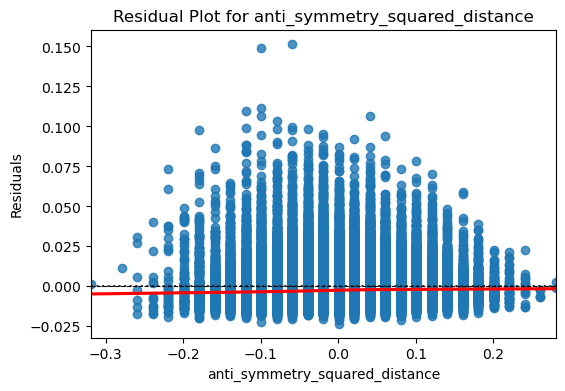

Mean Squared Error for anti_symmetry_squared_distance: 0.0236


c:\Users\tebog\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


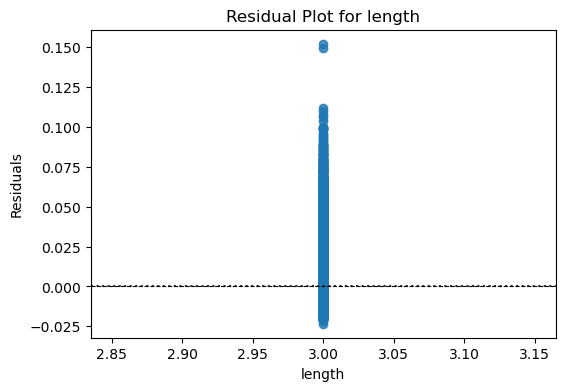

Mean Squared Error for length: 0.0018


c:\Users\tebog\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


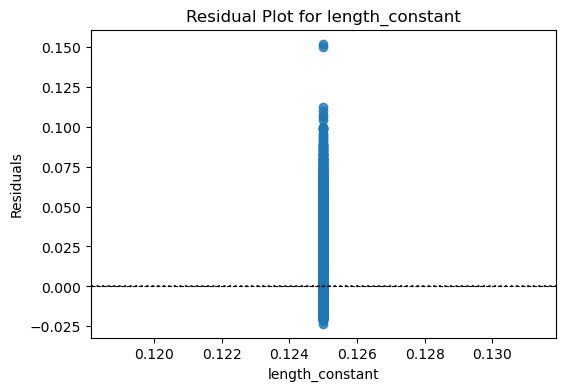

Mean Squared Error for length_constant: 0.0197


In [127]:
for feature in X_train.columns:
    # Simple linear regression
    X_train_feature = X_train[[feature]]  
    X_test_feature = X_test[[feature]]    
    
    model = LinearRegression()
    model.fit(X_train_feature, y_train)
    y_pred = model.predict(X_test_feature) 
    
    # Calculate residuals for test set
    residuals = y_test - y_pred
    
    # Residuals plot
    plt.figure(figsize=(6, 4))
    sns.residplot(x=X_test_feature.squeeze(), y=residuals, lowess=True, line_kws={'color': 'red'})
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
    plt.title(f'Residual Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Residuals')
    plt.show()
    
    # RMSE
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for {feature}: {mse:.4f}')


## Linear Regression

In [128]:
Linreg = LinearRegression()
Linreg.fit(X_train, y_train)

y_pred = Linreg.predict(X_test)

In [129]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.0017177558028059017
Root Mean Squared Error: 0.041445817675682325
Mean Absolute Error: 0.04067643369840152
R^2 Score: -9.948913030950703


Linear Regression RMSE (0.0413) is significantly larger than the baseline RMSE (0.0125).

Since RMSE represents the square root of the average squared prediction error, a higher RMSE indicates that the predictions from the linear regression model have larger average deviations from the actual values compared to the baseline model.



## Random Forest

In [130]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Metrics:")
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("Mean Absolute Error:", mae_rf)
print("R^2 Score:", r2_rf)


Random Forest Regressor Metrics:
Mean Squared Error: 5.1485204098103814e-05
Root Mean Squared Error: 0.007175319093817627
Mean Absolute Error: 0.0054055156555179625
R^2 Score: 0.6718351810367416


In [138]:
# # Calculate Pearson correlation coefficient
# correlation, _ = pearsonr(y_test, y_pred_rf)

# # Plot Actual vs Predicted values with correlation
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred_rf, alpha=0.6, label=f"Correlation: {correlation:.4f}")
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted Values with Correlation')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
# plt.grid(True)
# plt.legend()
# plt.show()

Feature Importances:
length: 0.9833465791270768
popular_proportions: 0.010020574043835426
length_constant: 0.0017994274915848888
blockiness_values: 0.0015228028370328117
transition_frequency_squared_distance: 0.0008277880815995668
transition_frequency: 0.0008272950779038362
anti_symmetry: 0.0005983768422897776
anti_symmetry_squared_distance: 0.0005981015595372722
proportion_red: 0.0004590549391397032


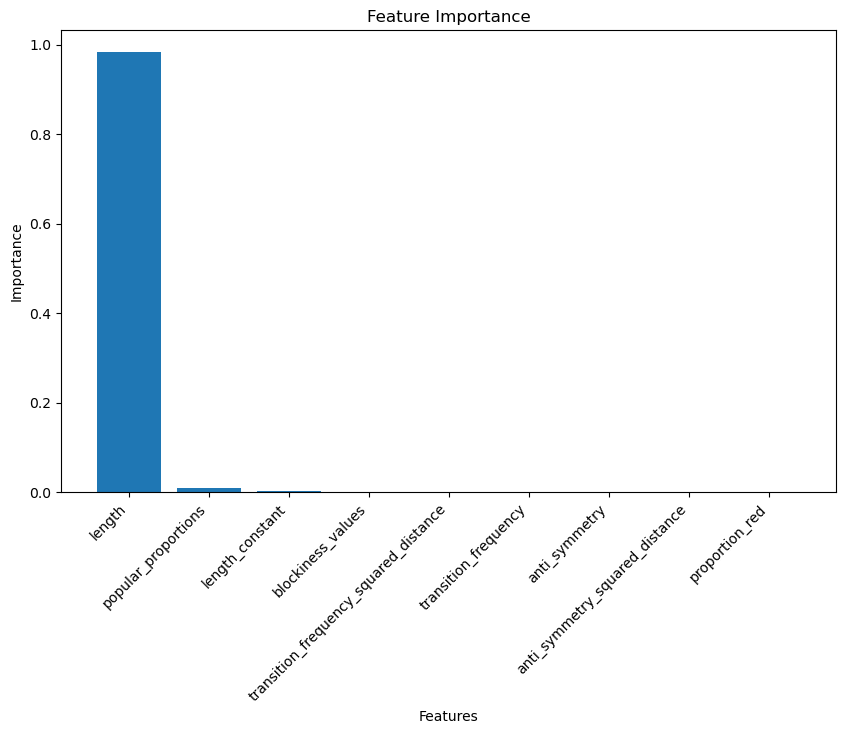

In [132]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X_train.columns[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

print("Feature Importances:")
for feature, importance in zip(sorted_features, sorted_importances):
    print(f"{feature}: {importance}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, tick_label=sorted_features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [133]:
y_base = pd.Series([1/2**(3-1)]*50000)

## RMSE Base Model

In [134]:
np.sqrt(mean_squared_error(y_test, y_base))

0.012525780894036689

Key Points:
RMSE Random Forest = 0.0072: The model is on average off by 0.0072 units from the actual values.

RMSE Baseline = 0.0125: The model is on average off by 0.0125 units from the actual values.

Conclusion:
Since lower RMSE is better, the Random Forest RMSE represents the better-performing model between the two, as it has a smaller average error.

## Multi Layer Perceptron

In [135]:
model_nn = MLPRegressor(hidden_layer_sizes=(200,200),
                     activation='relu',
                     verbose=0)

model_nn.fit(X_train, y_train)

y_pred_nn = model_nn.predict(X_test)

mse_mlp2 = mean_squared_error(y_test, y_pred_nn)
rmse_mlp2 = np.sqrt(mse_mlp2)
mae_mlp2 = mean_absolute_error(y_test, y_pred_nn)
r2_mlp2 = r2_score(y_test, y_pred_nn)

print(f'Mean Squared Error (MSE): {mse_mlp2}')
print(f'Root Mean Squared Error (RMSE): {rmse_mlp2}')
print(f'Mean Absolute Error (MAE): {mae_mlp2}')
print(f'R-squared (R²): {r2_mlp2}')

Mean Squared Error (MSE): 5.2936155648282934e-05
Root Mean Squared Error (RMSE): 0.0072757237198977625
Mean Absolute Error (MAE): 0.005908419792229169
R-squared (R²): 0.6625868686112591


In [136]:
X_train

,anti_symmetry,proportion_red,blockiness_values,transition_frequency,popular_proportions,transition_frequency_squared_distance,anti_symmetry_squared_distance,length,length_constant
0,0.4800000000,0.5000000000,0.0800000000,0.2600000000,0.5000000000,0.0125319500,-0.0198438000,3,0.1250000000
1,0.5200000000,0.5000000000,0.0600000000,0.2250000000,0.5000000000,-0.0224680500,0.0201562000,3,0.1250000000
2,0.4400000000,0.5400000000,0.0700000000,0.2400000000,0.5400000000,-0.0074680500,-0.0598438000,3,0.1250000000
3,0.5800000000,0.4900000000,0.0900000000,0.2300000000,0.5100000000,-0.0174680500,0.0801562000,3,0.1250000000
4,0.5600000000,0.5200000000,0.0700000000,0.2450000000,0.5200000000,-0.0024680500,0.0601562000,3,0.1250000000
...,...,...,...,...,...,...,...,...,...
499995,0.4800000000,0.5000000000,0.0700000000,0.2700000000,0.5000000000,0.0225319500,-0.0198438000,7,0.0078125000
499996,0.6400000000,0.5000000000,0.0500000000,0.2850000000,0.5000000000,0.0375319500,0.1401562000,7,0.0078125000
499997,0.4600000000,0.4900000000,0.0900000000,0.2200000000,0.5100000000,-0.0274680500,-0.0398438000,7,0.0078125000
499998,0.4800000000,0.5000000000,0.0600000000,0.2750000000,0.5000000000,0.0275319500,-0.0198438000,7,0.0078125000


In [137]:
np.sqrt(mse_mlp2)

0.0072757237198977625